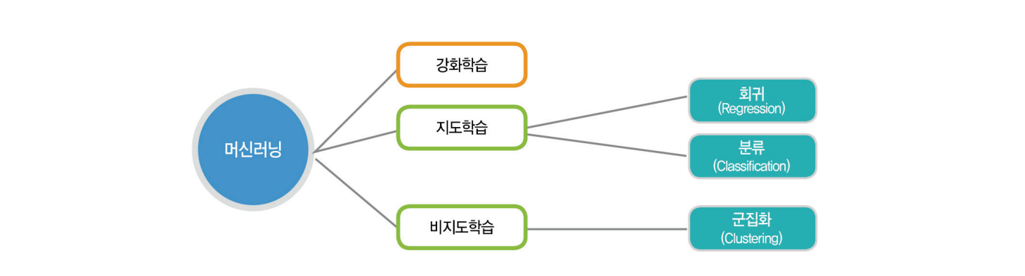

# 군집(Clustering)

* 군집(Clustering)은 특징이 비슷한 데이터들끼리 그룹핑해주는 머신러닝 기법을 총칭합니다. 
* 비지도학습(Unsupervised Learning)에 해당합니다. 
* 레이블이 없는 데이터를 분류하는 머신러닝 기법입니다. 
* 주요 클러스터링 알고리즘
    * KMeans, DBSCAN, Hierarchical Clustering 등이 있습니다. 
    * 이 중에서 가장 기본적이면서도, 최근까지 사용되는 알고리즘이 KMeans알고리즘입니다. 
    
* 군집화 활용 분야
    * 고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)
    * Image 검출, 세분화
    * 이상 검출(abnomaly detection)


```
Q. 정답도 없는데 어떻게 군집(유사성)을 정의할 것인가?**
```

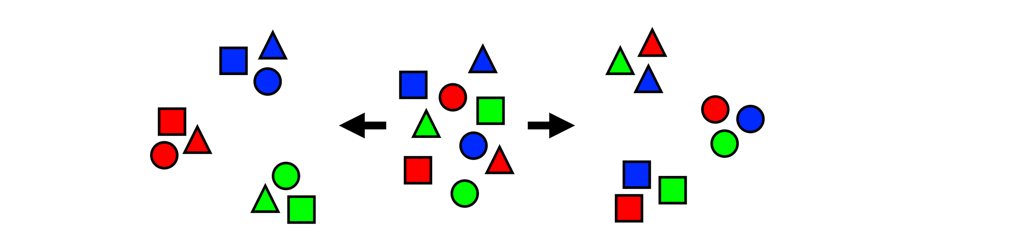

## K-Means

* 군집 중심점(Centroid)기반 클러스터링입니다. 
* KMeans 알고리즘 동작 방식
    1. k값 결정(얼마나 많은 클러스터가 필요한지를 결정)
    2. 초기 Centroid결정
    3. 모든 데이터를 순회하며, 각 데이터마다 가장 가까운 Centroid를 찾아서 해당 클러스터에 할당
    4. 모든 데이터를 순회한 후, Centroid를 각 클러스터의 중심으로 이동
    5. 각 클러스터에 재할당되는 데이터가 없을 때까지 3과 4를 반복


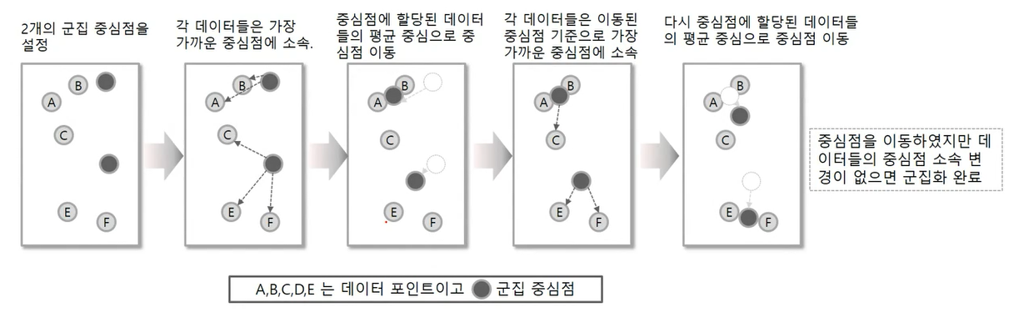

<center>
<img src="https://miro.medium.com/max/832/1*O6_nsE3nLwPw1thqaGmTYA.gif" width="400" height="300"  />
</center>

    
* 장점
    * 알고리즘이 간결하고 쉽습니다. 
    * 일반적인 군집화에서 가장 많이 활용되는 알고리즘입니다. 
* 단점
    * K를 미리 정해줘야함. ==> 최악!! 내가 뭘 안다고 군집수를 정하지?
    * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어집니다. 
    * 거리 기반 알고리즘으로 데이터 표준화나 정규화를 꼭 해줘야 한다.
    * 이를 위해 PCA로 차원 축소를 적용해야 할 수도 있습니다. 
    * 반복을 수행하는데, 반복횟수가 많을 경우 수행 시간이 느려집니다. 
    * 이상치(Outlier)데이터에 취약합니다. 

## 평가 지표

* 비지도 학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵습니다.
* **```inertia value```** 
    * 군집화된 후, 각 Centroid에서 군집된 데이터 간의 거리를 합산한 값으로 응집도를 수치화 한 것입니다.
    * 낮을 수록 좋음
* 그럼에도 불구하고 군집화의 성능을 평가하는 대표적인 방법으로 **```실루엣 분석```** 을 이용한다.


### 실루엣 분석

* 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냅니다. 
* 개별 데이터가 가지는 군집화 지표인 실루엣 계수(Sillhouette coefficient)를 기반으로 합니다. 
* 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고,
* 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표입니다. 
* 사이킷런에서 실루엣 평가 클래스를 지원합니다. (sklearn.metrics.silhouette_score())
* 전체 실루엣 계수의 평균값을 나타내며, -1 ~ 1사이의 값을 가지며, 1에 가까울수록 좋습니다. 
* 개별 군집의 평균값의 편차가 크지 않아야 합니다.(개별 군집들이 고르게 평균값에 위치해야함.)


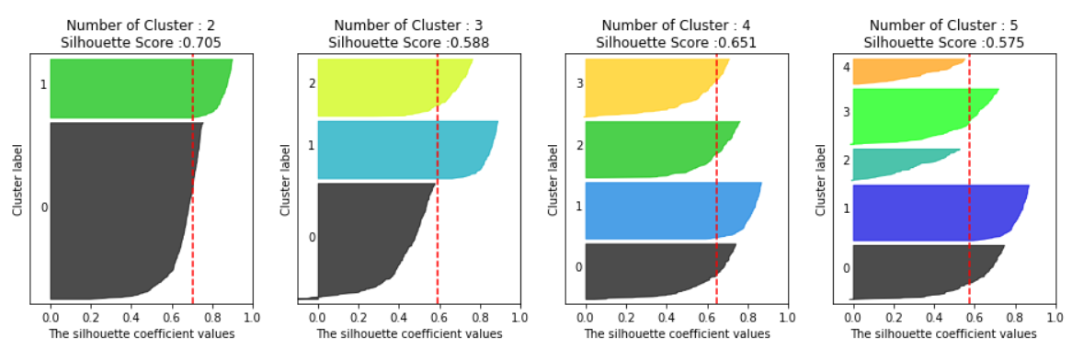

1. 실루엣 계수가 1에 가까울 것
2. 군집된 두께가 골고루 이룰것(균형적일 것)

---

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
############### 레이블 없음 #################
x_data_df = pd.DataFrame(x_data,columns=['길이','무게'])
#y_data = np.array([2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2])

#labels = ['A', 'B', 'C']

##########데이터 분석

##########데이터 전처리

##########모델 생성

##########모델 학습

##########모델 검증

##########모델 예측


---

pip install yellowbrick

## 엘보우 차트

* 군집 내 중심점과 관측치 간 거리합(inertia value)가 급감하는 구간의 k 개수를 선정하는 방법
* 잘 묶였을 때 급감하겠지~~

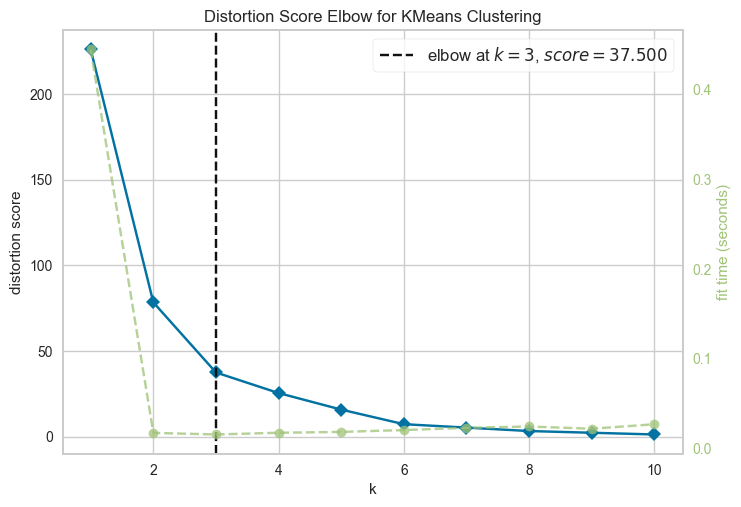

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

Elbow_Chart = KElbowVisualizer(model, k=(1,11))
Elbow_Chart.fit(x_data)
Elbow_Chart.show()

```
k=3이 , 4일때 급감(inertia)했다는 것은 유사한 것끼리 잘 묶였다는 것을 의미한다. 

3으로 설정하는 것이 적절하다.
```

## 실루엣 분석

In [3]:
divmod(5,2)

(2, 1)

실루엣 스코어(1에 근접해야 좋음): 0.5003019230876485


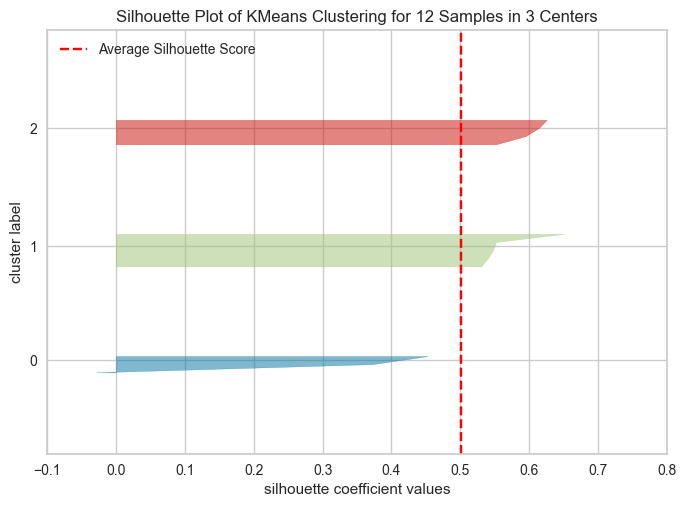

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 12 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [4]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(x_data)        # Fit the data to the visualizer

score = silhouette_score(x_data, model.labels_)
print(f'실루엣 스코어(1에 근접해야 좋음): {score}')
visualizer.show()        # Finalize and render the figure

In [5]:
for i in range(2,6):
    q,mod = divmod(i,2)
    print(i, q, mod)

2 1 0
3 1 1
4 2 0
5 2 1


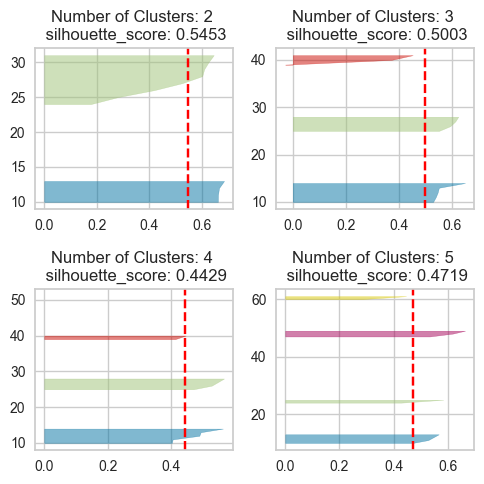

In [6]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,2,figsize=(5,5))
for i in range(2,6):   # k = 2,3,4,5 일때의 실루엣 분석을 시도
    q,mod = divmod(i,2)
    model = KMeans(n_clusters=i,random_state=3)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(x_data)    

    score = silhouette_score(x_data, model.labels_)
    # print(f'실루엣 스코어(1에 근접해야 좋음): {score}')
    ax[q - 1][mod].set_title(f'Number of Clusters: {i} \n silhouette_score: {score:.4f}')

plt.tight_layout()
plt.show()    

```
엘보우 기법과, 실루엣 분석을 고려해서 클러스트 갯수 k를 정함
```

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
x_data_df = pd.DataFrame(x_data,columns=['길이','무게'])
#y_data = np.array([2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2])

#labels = ['A', 'B', 'C']

##########데이터 분석

##########데이터 전처리

##########모델 생성

model = KMeans(n_clusters=3)
# model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-4)

##########모델 학습

model.fit(x_data)
x_data_df['cluster'] = model.labels_


##########모델 검증

print(model.inertia_) #37.5 #관성값: 샘플과 클러스터간 거리 제곱 합, 작을수록 좋음

##########모델 예측

# y_predict = model.predict(x_data)

# print(y_predict) 


37.5


In [8]:
x_data_df

,길이,무게,cluster
0,2,1,2
1,3,2,2
2,3,4,2
3,5,5,1
4,7,5,1
5,2,5,2
6,8,9,0
7,9,10,0
8,6,12,0
9,9,2,1


In [9]:
x_data_df.groupby(by='cluster').count()

,길이,무게
cluster,,
0,4,4
1,3,3
2,5,5


## 평가

In [10]:
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples

# 개별 데이터의 각 실루엣 계수값을 구함. 
score_samples = silhouette_samples(x_data, model.labels_)

# 실루엣 계수 컬럼 추가
x_data_df['silhouette_coeff'] = score_samples
x_data_df.head()

,길이,무게,cluster,silhouette_coeff
0,2,1,2,0.530027
1,3,2,2,0.547472
2,3,4,2,0.551995
3,5,5,1,-0.028349
4,7,5,1,0.453122


In [11]:
# 각 클러스터별 실루엣 계수 평균
x_data_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.596470
1    0.265797
2    0.564070
Name: silhouette_coeff, dtype: float64

In [12]:
# 모든 데이터의 평균 실루엣 계수값을 구함.
silhouette_score(x_data, model.labels_)

0.5003019230876485

In [13]:
KMeans?


Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': cho